In [221]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,log_loss
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt


In [222]:
train_1 = pd.read_csv('Train.csv')
test_1 = pd.read_csv('Test.csv')
train = train_1.copy()
test = test_1.copy()

delete = ['f23','f24','f25','f26','f27']
for i in delete:
    del train[i]

In [223]:
y = train.grade
X = train.drop(['grade'],axis=1)

In [241]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from imblearn.over_sampling import SMOTE
smote = SMOTE('minority',random_state=42,n_jobs=-1)
X_sm,Y_sm = smote.fit_sample(X_sm,Y_sm)


In [242]:
# from imblearn.over_sampling import RandomOverSampler

# ran=RandomOverSampler()
# X_ran,y_ran= ran.fit_resample(X,y)

# print('The new data contains {} rows '.format(X_ran.shape[0]))

In [243]:
Y_sm.value_counts()

3    472
1    472
4    472
2    472
0    472
Name: grade, dtype: int64

In [244]:
x_train,x_test,y_train,y_test = train_test_split(X_sm,Y_sm,random_state=42,test_size=0.2)

0:	learn: 1.5420604	total: 7.53ms	remaining: 7.53s
1:	learn: 1.4706362	total: 15.1ms	remaining: 7.51s
2:	learn: 1.4081549	total: 19.8ms	remaining: 6.59s
3:	learn: 1.3485570	total: 23.2ms	remaining: 5.77s
4:	learn: 1.2925100	total: 26.3ms	remaining: 5.24s
5:	learn: 1.2460989	total: 29.7ms	remaining: 4.92s
6:	learn: 1.2004868	total: 32.7ms	remaining: 4.64s
7:	learn: 1.1601636	total: 36.2ms	remaining: 4.49s
8:	learn: 1.1173501	total: 39.1ms	remaining: 4.31s
9:	learn: 1.0776286	total: 42.2ms	remaining: 4.17s
10:	learn: 1.0459440	total: 46.7ms	remaining: 4.2s
11:	learn: 1.0142110	total: 50.3ms	remaining: 4.14s
12:	learn: 0.9820039	total: 53.3ms	remaining: 4.05s
13:	learn: 0.9540006	total: 56.5ms	remaining: 3.98s
14:	learn: 0.9269479	total: 59.4ms	remaining: 3.9s
15:	learn: 0.8997029	total: 62.7ms	remaining: 3.85s
16:	learn: 0.8714883	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8465951	total: 69ms	remaining: 3.77s
18:	learn: 0.8234309	total: 72.1ms	remaining: 3.72s
19:	learn: 0.8013229	total

169:	learn: 0.1389384	total: 572ms	remaining: 2.79s
170:	learn: 0.1381910	total: 575ms	remaining: 2.79s
171:	learn: 0.1374302	total: 579ms	remaining: 2.79s
172:	learn: 0.1367133	total: 585ms	remaining: 2.8s
173:	learn: 0.1358874	total: 592ms	remaining: 2.81s
174:	learn: 0.1350249	total: 595ms	remaining: 2.8s
175:	learn: 0.1343655	total: 598ms	remaining: 2.8s
176:	learn: 0.1338296	total: 601ms	remaining: 2.8s
177:	learn: 0.1330997	total: 604ms	remaining: 2.79s
178:	learn: 0.1323959	total: 607ms	remaining: 2.78s
179:	learn: 0.1317442	total: 610ms	remaining: 2.78s
180:	learn: 0.1313577	total: 613ms	remaining: 2.77s
181:	learn: 0.1305543	total: 616ms	remaining: 2.77s
182:	learn: 0.1302033	total: 619ms	remaining: 2.76s
183:	learn: 0.1293790	total: 622ms	remaining: 2.76s
184:	learn: 0.1288672	total: 625ms	remaining: 2.75s
185:	learn: 0.1283178	total: 628ms	remaining: 2.75s
186:	learn: 0.1275469	total: 631ms	remaining: 2.74s
187:	learn: 0.1269456	total: 634ms	remaining: 2.74s
188:	learn: 0.12

336:	learn: 0.0719635	total: 1.13s	remaining: 2.22s
337:	learn: 0.0717924	total: 1.13s	remaining: 2.22s
338:	learn: 0.0716209	total: 1.14s	remaining: 2.21s
339:	learn: 0.0714177	total: 1.14s	remaining: 2.21s
340:	learn: 0.0712227	total: 1.15s	remaining: 2.22s
341:	learn: 0.0710235	total: 1.15s	remaining: 2.21s
342:	learn: 0.0708580	total: 1.15s	remaining: 2.21s
343:	learn: 0.0706475	total: 1.16s	remaining: 2.21s
344:	learn: 0.0704525	total: 1.16s	remaining: 2.2s
345:	learn: 0.0702810	total: 1.16s	remaining: 2.2s
346:	learn: 0.0699753	total: 1.17s	remaining: 2.19s
347:	learn: 0.0698051	total: 1.17s	remaining: 2.19s
348:	learn: 0.0695423	total: 1.17s	remaining: 2.19s
349:	learn: 0.0693501	total: 1.18s	remaining: 2.19s
350:	learn: 0.0691930	total: 1.18s	remaining: 2.18s
351:	learn: 0.0689514	total: 1.18s	remaining: 2.18s
352:	learn: 0.0687711	total: 1.19s	remaining: 2.18s
353:	learn: 0.0685585	total: 1.19s	remaining: 2.17s
354:	learn: 0.0683589	total: 1.19s	remaining: 2.17s
355:	learn: 0.

500:	learn: 0.0501087	total: 1.69s	remaining: 1.68s
501:	learn: 0.0500045	total: 1.69s	remaining: 1.68s
502:	learn: 0.0499496	total: 1.69s	remaining: 1.67s
503:	learn: 0.0498419	total: 1.7s	remaining: 1.68s
504:	learn: 0.0497391	total: 1.71s	remaining: 1.67s
505:	learn: 0.0496561	total: 1.71s	remaining: 1.67s
506:	learn: 0.0495783	total: 1.71s	remaining: 1.66s
507:	learn: 0.0494953	total: 1.72s	remaining: 1.66s
508:	learn: 0.0494046	total: 1.72s	remaining: 1.66s
509:	learn: 0.0493609	total: 1.72s	remaining: 1.65s
510:	learn: 0.0493186	total: 1.73s	remaining: 1.65s
511:	learn: 0.0492428	total: 1.73s	remaining: 1.65s
512:	learn: 0.0491335	total: 1.73s	remaining: 1.64s
513:	learn: 0.0490445	total: 1.74s	remaining: 1.64s
514:	learn: 0.0489768	total: 1.74s	remaining: 1.64s
515:	learn: 0.0488729	total: 1.74s	remaining: 1.63s
516:	learn: 0.0487377	total: 1.74s	remaining: 1.63s
517:	learn: 0.0486299	total: 1.75s	remaining: 1.63s
518:	learn: 0.0485543	total: 1.75s	remaining: 1.62s
519:	learn: 0

666:	learn: 0.0396990	total: 2.24s	remaining: 1.12s
667:	learn: 0.0396660	total: 2.25s	remaining: 1.12s
668:	learn: 0.0396168	total: 2.25s	remaining: 1.11s
669:	learn: 0.0395648	total: 2.26s	remaining: 1.11s
670:	learn: 0.0395099	total: 2.26s	remaining: 1.11s
671:	learn: 0.0394781	total: 2.27s	remaining: 1.1s
672:	learn: 0.0394435	total: 2.27s	remaining: 1.1s
673:	learn: 0.0393886	total: 2.27s	remaining: 1.1s
674:	learn: 0.0393435	total: 2.27s	remaining: 1.09s
675:	learn: 0.0393032	total: 2.28s	remaining: 1.09s
676:	learn: 0.0392313	total: 2.28s	remaining: 1.09s
677:	learn: 0.0391504	total: 2.29s	remaining: 1.08s
678:	learn: 0.0391173	total: 2.29s	remaining: 1.08s
679:	learn: 0.0390780	total: 2.29s	remaining: 1.08s
680:	learn: 0.0390488	total: 2.29s	remaining: 1.07s
681:	learn: 0.0390024	total: 2.3s	remaining: 1.07s
682:	learn: 0.0389778	total: 2.3s	remaining: 1.07s
683:	learn: 0.0389190	total: 2.3s	remaining: 1.06s
684:	learn: 0.0388814	total: 2.31s	remaining: 1.06s
685:	learn: 0.0388

828:	learn: 0.0337913	total: 2.79s	remaining: 577ms
829:	learn: 0.0337722	total: 2.8s	remaining: 574ms
830:	learn: 0.0337442	total: 2.81s	remaining: 571ms
831:	learn: 0.0337087	total: 2.81s	remaining: 568ms
832:	learn: 0.0336758	total: 2.82s	remaining: 565ms
833:	learn: 0.0336526	total: 2.82s	remaining: 561ms
834:	learn: 0.0336308	total: 2.82s	remaining: 558ms
835:	learn: 0.0335880	total: 2.83s	remaining: 555ms
836:	learn: 0.0335568	total: 2.83s	remaining: 551ms
837:	learn: 0.0335374	total: 2.83s	remaining: 548ms
838:	learn: 0.0335008	total: 2.84s	remaining: 544ms
839:	learn: 0.0334778	total: 2.84s	remaining: 541ms
840:	learn: 0.0334447	total: 2.84s	remaining: 537ms
841:	learn: 0.0334296	total: 2.84s	remaining: 534ms
842:	learn: 0.0334085	total: 2.85s	remaining: 530ms
843:	learn: 0.0333752	total: 2.85s	remaining: 527ms
844:	learn: 0.0333496	total: 2.85s	remaining: 523ms
845:	learn: 0.0333168	total: 2.86s	remaining: 520ms
846:	learn: 0.0332801	total: 2.86s	remaining: 517ms
847:	learn: 0

997:	learn: 0.0296642	total: 3.35s	remaining: 6.72ms
998:	learn: 0.0296363	total: 3.36s	remaining: 3.36ms
999:	learn: 0.0296031	total: 3.37s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.98      1.00      0.99        93
           2       1.00      0.97      0.99       104
           3       0.99      1.00      0.99        83
           4       1.00      1.00      1.00       100

    accuracy                           0.99       472
   macro avg       0.99      0.99      0.99       472
weighted avg       0.99      0.99      0.99       472

0.03585857975398542


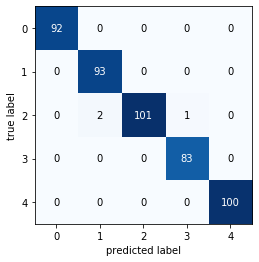

In [245]:
cat = CatBoostClassifier()
cat.fit(x_train,y_train)
y_pred = cat.predict(x_test)
y_pred_proba = cat.predict_proba(x_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print(log_loss(y_test,y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.98      1.00      0.99        93
           2       1.00      0.97      0.99       104
           3       0.99      1.00      0.99        83
           4       1.00      1.00      1.00       100

    accuracy                           0.99       472
   macro avg       0.99      0.99      0.99       472
weighted avg       0.99      0.99      0.99       472

0.020222989176274426


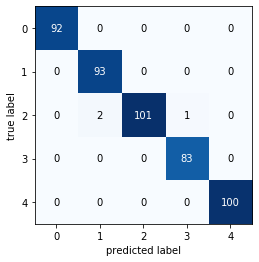

In [246]:
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)
y_pred_proba = lgbm.predict_proba(x_test)
print(classification_report(y_test,y_pred))y_pred = lgbm.predict(x_test)
y_pred_proba = lgbm.predict_proba(x_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print(log_loss(y_test,y_pred_proba))
plot_confusion_matrix(confusion_matrix(y_test,y_pred))
print(log_loss(y_test,y_pred_proba))

In [248]:
for i in delete:
    del test[i]

In [249]:
pred = cat.predict_proba(test)

In [250]:
sub = pd.DataFrame(pred)

In [251]:
sub.to_excel("smote2.xlsx",index=False)